In [1]:
import sys
sys.path.append('/Users/ham/Desktop/LSHiforest')
import numpy as np
import pandas as pd
import networkx as nx
from JLSHiForest import JLSHiForest
from sklearn.metrics import accuracy_score

In [2]:
# データのインポート
df = pd.read_csv('csic_database.csv')
df.head()
df.nunique()

columns = ['Method', 'host', 'connection', 'lenght', 'content']
X = df[columns]
y_true = df['classification']

In [3]:
X.head()

,Method,host,connection,lenght,content
0,GET,localhost:8080,close,NaN,NaN
1,GET,localhost:8080,close,NaN,NaN
2,POST,localhost:8080,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...
3,GET,localhost:8080,close,NaN,NaN
4,POST,localhost:8080,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...


In [ ]:
normal_indices = np.where(y_true == 0)[0]
anomaly_indices = np.where(y_true == 1)[0]

train_normal_indices = normal_indices[:20000]
test_normal_indices = normal_indices[20000:]
train_indices = train_normal_indices
test_indices = np.concatenate([test_normal_indices, anomaly_indices])
X_train = X.iloc[train_indices]
y_train = y_true[train_indices]
X_test = X.iloc[test_indices]
y_test = y_true[test_indices]
print(f"トレーニングデータ: {len(X_train)}件 (すべて正常データ)")
print(f"テストデータ: {len(X_test)}件")
print(f" - 正常データ: {sum(y_test == 0)}件")
print(f" - 異常データ: {sum(y_test == 1)}件")

トレーニングデータ: 20000件 (すべて正常データ)
テストデータ: 41065件
 - 正常データ: 16000件
 - 異常データ: 25065件


In [5]:
# モデル訓練・評価
model = JLSHiForest(n_trees=100, max_depth=7, num_hashes=2, min_samples=10, random_state=42)
model.fit(X_train)
scores = model.decision_function(X_test)

universe size : 2839


In [6]:
# accuracyの計算
y_pred = model.predict(scores)  # 予測ラベル（0:正常、1:異常）
print(f'Accuracy :{accuracy_score(y_test, y_pred)}')

Accuracy :0.4990624619505662


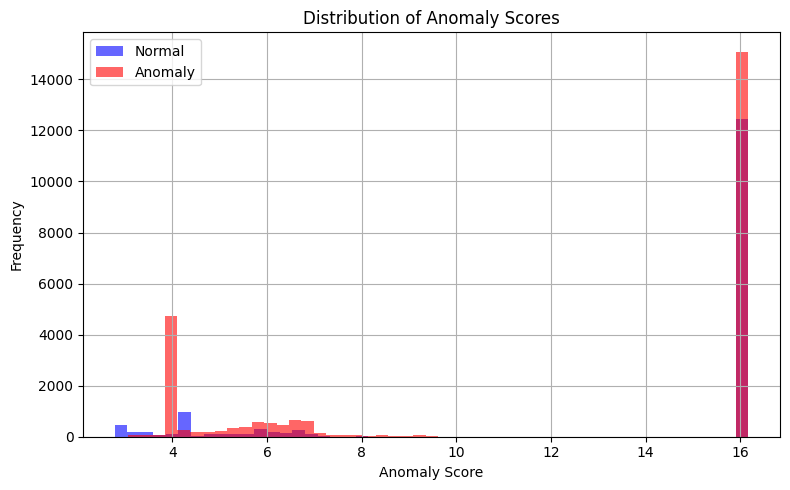

In [7]:
# 異常スコアの分布をプロット
model.plot_score_distribution(scores, y_test)

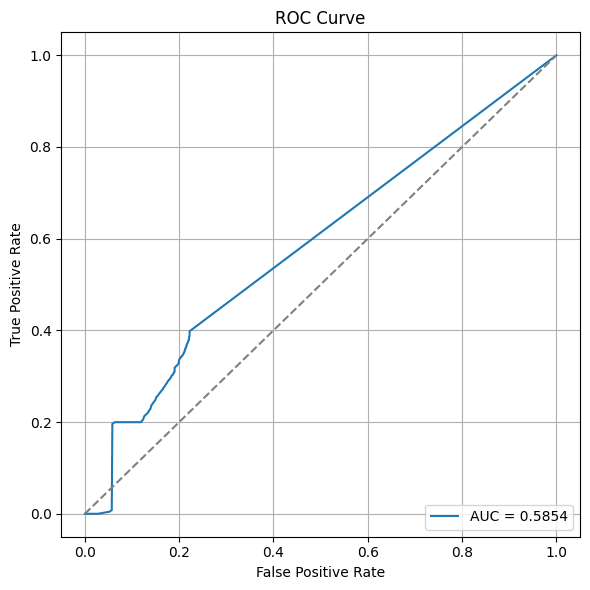

In [8]:
# AUC-ROCを計算
auc = model.plot_roc_curve(scores, y_test)

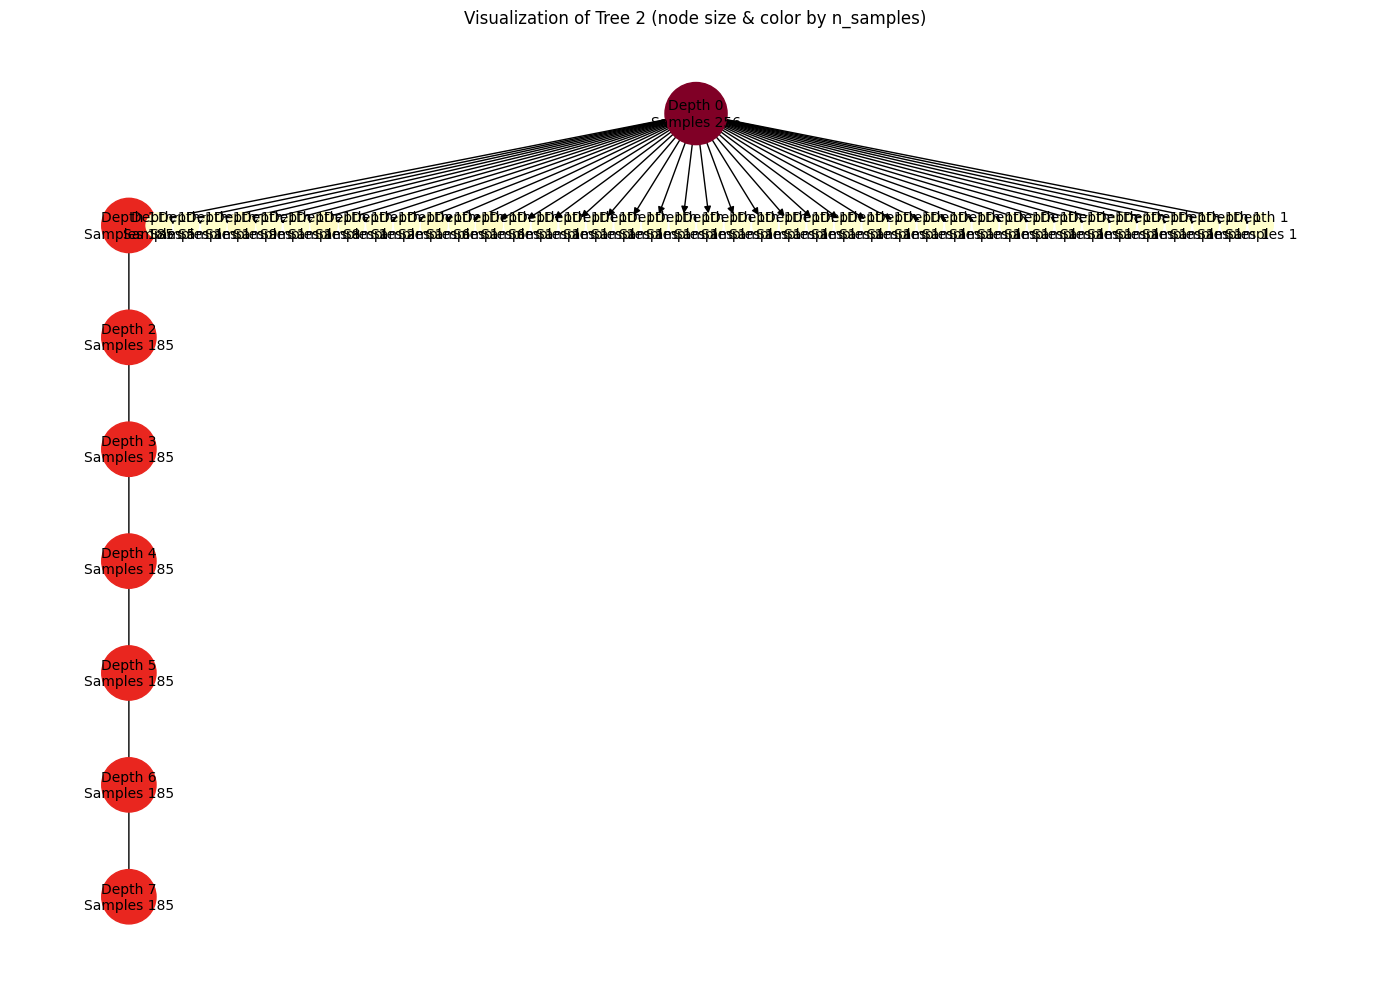

In [9]:
# 最初の木を可視化
model.visualize_tree(tree_index=2)